In [43]:
%matplotlib inline
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#import netCDF4
from scipy import stats
import statsmodels.api as sm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable
sys.path.append('/Users/gbromley/Dropbox/code/python_utilities/')
from python_data_functions import extract_months
from python_met_functions import sat_vap_pres
from python_data_functions import mk_test
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText


In [2]:
obs_data = xr.open_dataarray('/Users/gbromley/Dropbox/Montana_Climate_Project/EOS/NGP_Temp_monthly.nc')

In [16]:
obs_data

<xarray.DataArray 't2m_trend' (month: 12, z: 636)>
array([[ 0.789208,  0.790996,  0.754425, ...,  1.049522,  1.023929,  1.039778],
       [-0.111255, -0.103053, -0.218933, ...,  0.123651,  0.179895,  0.192168],
       [ 0.49078 ,  0.431946,  0.469565, ...,  0.233488,  0.102683,  0.128153],
       ...,
       [ 0.066667,  0.04243 ,  0.057848, ..., -0.023558, -0.036509, -0.028554],
       [ 0.459698,  0.436756,  0.390194, ...,  0.311008,  0.272834,  0.282393],
       [ 0.113228,  0.159297,  0.04909 , ...,  0.678076,  0.613876,  0.628122]])
Coordinates:
  * month    (month) object 'January' 'February' ... 'November' 'December'
    lat      (z) float64 ...
    lon      (z) float64 ...
Dimensions without coordinates: z
Attributes:
    units:      C per Decade
    long_name:  2 meter temperature trend

In [5]:
model_data = pd.read_csv('/Users/gbromley/Dropbox/Montana_Climate_Project/EOS/LENS_T2M_trends_1970-2015_NNAGP.csv')

In [11]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']


In [12]:
model_data.set_axis(months, axis=1, inplace=True)

In [13]:
model_data

,January,February,March,April,May,June,July,August,September,October,November,December
0,0.753390,1.752049,1.216140,0.631518,0.629531,0.756233,0.849790,0.837395,0.829230,0.642296,0.827025,0.451114
1,1.096805,0.640124,0.426030,0.447257,0.674990,0.698648,1.142554,1.320065,1.076025,0.854390,0.486176,1.429088
2,1.880631,1.626946,0.827360,0.342680,0.491754,0.729726,0.993214,1.210571,0.886651,0.773407,1.011734,1.006789
3,1.502776,1.589941,1.535445,0.651224,0.411111,0.548594,0.817258,1.003321,0.859205,0.818076,1.220178,1.367441
4,0.259902,0.888489,0.557399,0.388021,0.249691,0.330224,0.711398,0.870755,0.843608,0.400554,0.689552,1.022823
5,0.332237,0.839038,1.035226,1.083140,0.660978,1.087025,1.352813,1.399895,1.117372,1.021519,0.717671,0.534807
6,-0.116620,0.461898,0.400375,0.450561,0.686006,0.930008,1.200504,0.915924,0.939773,0.872711,1.316250,0.937829
7,1.953380,1.400933,0.808766,0.700094,0.618526,0.716269,0.720004,0.924490,0.830247,0.587182,0.524002,0.152200
8,1.000246,0.981131,0.198135,0.440874,0.456261,0.740256,0.947052,0.757405,0.901711,0.621382,0.646834,1.135399
9,1.781108,1.517473,1.131456,0.946839,0.785163,0.727061,0.769220,1.138408,0.812357,0.902988,0.533610,1.015892


{'whiskers': [<matplotlib.lines.Line2D at 0x12d657278>,
 'caps': [<matplotlib.lines.Line2D at 0x12d6572e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d657518>,
 'medians': [<matplotlib.lines.Line2D at 0x12d686eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x12d686da0>,
 'means': []}

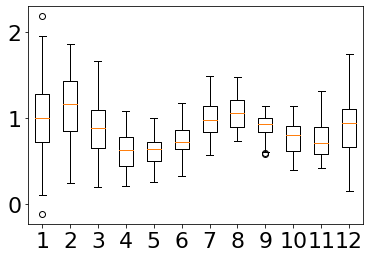

In [19]:
plt.boxplot(model_data.T)

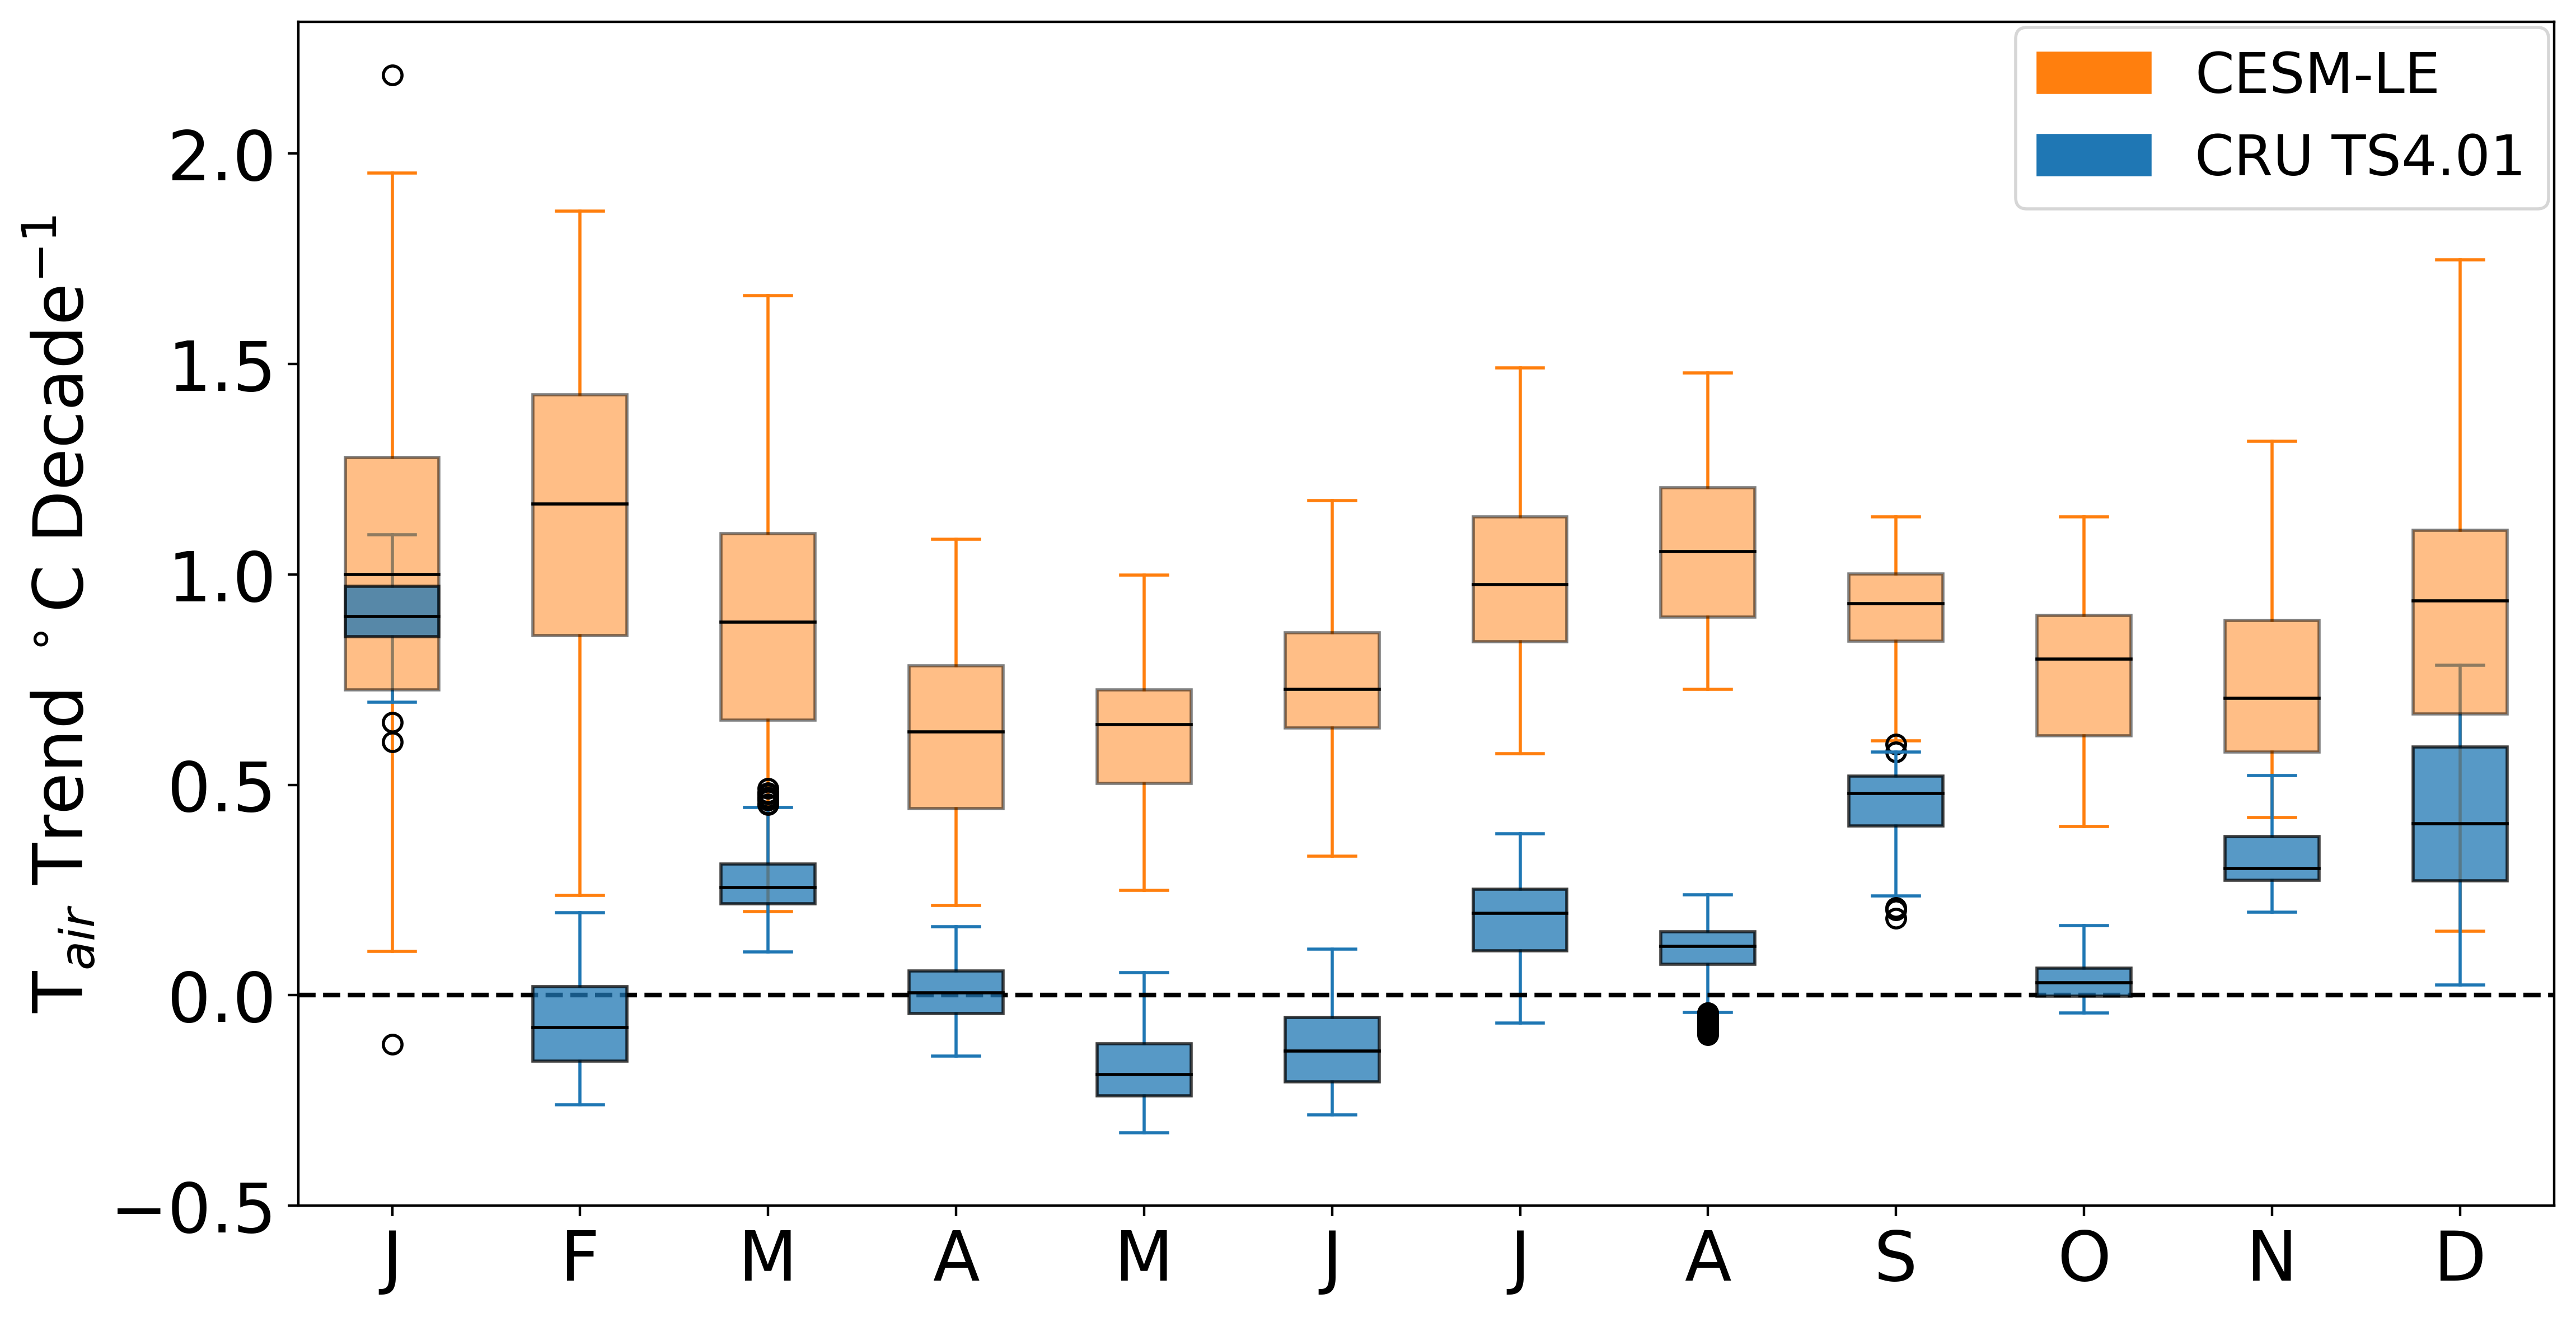

In [61]:
plt.rcParams.update({'font.size': 22})
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
fig, ax = plt.subplots(ncols=1)
fig.set_dpi(400)
fig.set_size_inches((13,7))

edge_color = 'black'
pos = np.array(range(len(obs_data))) + 1

mp = plt.boxplot(model_data.T, positions=pos, patch_artist=True)
for element in ['boxes', 'means','whiskers','fliers','medians', 'caps']:
    plt.setp(mp[element], color=edge_color)
for element in ['whiskers','caps']:
    plt.setp(mp[element], color='tab:orange')    
for patch in mp['boxes']:
    patch.set(facecolor='tab:orange', alpha=0.5)  
    
op = plt.boxplot(obs_data, positions=pos, patch_artist=True)
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(op[element], color=edge_color)
for element in ['whiskers','caps']:
    plt.setp(op[element], color='tab:blue',)
for patch in op['boxes']:
    patch.set(facecolor='tab:blue', alpha=0.75)  

plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12], month)
plt.yticks([-0.5,0,0.5,1.0,1.5,2.0])
ax.axhline(0,color='black', ls='--')
ax.set_ylabel('T$_{air}$ Trend $^\circ$C Decade$^{-1}$')

op_artist = mpatches.Patch(color='tab:blue', label='CRU TS4.01')
mp_artist = mpatches.Patch(color='tab:orange', label='CESM-LE')
ax.legend(handles=[mp_artist,op_artist],loc='upper right',borderaxespad=0.1, fontsize=18)


#plt.savefig('/Users/gbromley/Dropbox/Montana_Climate_Project/EOS/EOSmodel-obs_comparison_boxplots.png',bbox_inches='tight')


In [34]:
op['boxes'][0]